<a href="https://colab.research.google.com/github/DrDjango/Projects/blob/main/Sentiment_Analysis_Mcdonalds_DivisionSt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import urllib.parse
import requests
import pprint
import json


In [2]:
# Constants
KEY = ""

In [3]:
def geoCodePlace(place):
    """Returns the geoCodedPlace for the given place"""

    url = "https://maps.googleapis.com/maps/api/geocode/json"
    params = {"address": place, "key": KEY}
    response = requests.get(url, params=urllib.parse.urlencode(params))
    return response.json()

In [4]:
def getPlaceDetails(place_id):
    """Returns the place details for the given place id"""

    url = "https://places.googleapis.com/v1/places/{}".format(place_id)
    params = {
        "fields": "id,displayName,rating,userRatingCount,reviews",
        "key": KEY,
    }
    response = requests.get(url, params=urllib.parse.urlencode(params))
    return response.json()

In [15]:
def main():
    # Define the place
    place = "McDonald's, Division St, Kingston"

    # Get the geoCodedPlace
    geoCodedPlace = geoCodePlace(place)
    print("\nThis is the geoCodedPlace:")
    pprint.pprint(geoCodedPlace)


    # Get the place id
    place_id = geoCodedPlace["results"][0]["place_id"]
    print("\nThis is the place id:")
    print(place_id)


    # Get the place details
    placeDetails = getPlaceDetails(place_id)
    print("\nThese are the place details:")
    pprint.pprint(placeDetails)
    # Save the JSON object
    with open("placeDetails.json", "w") as outfile:
        json.dump(placeDetails, outfile, indent=4)

if __name__ == "__main__":
    main()


This is the geoCodedPlace:
{'results': [{'address_components': [{'long_name': '1165',
                                      'short_name': '1165',
                                      'types': ['street_number']},
                                     {'long_name': 'Division Street',
                                      'short_name': 'Division St',
                                      'types': ['route']},
                                     {'long_name': 'Rideau Heights',
                                      'short_name': 'Rideau Heights',
                                      'types': ['neighborhood', 'political']},
                                     {'long_name': 'Kingston',
                                      'short_name': 'Kingston',
                                      'types': ['locality', 'political']},
                                     {'long_name': 'Kingston',
                                      'short_name': 'Kingston',
                                      'type

In [16]:
# Imports the Google Cloud client library
from google.cloud import language_v1
import os

In [24]:
# Set the environment variable
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "service-account.json"

In [25]:
# Load the JSON file
with open('placeDetails.json', 'r') as file:
    data = json.load(file)

# Initialize a client for the Google Natural Language API
client = language_v1.LanguageServiceClient()

# Function to analyze sentiment of a text
def analyze_sentiment(text):
    document = language_v1.Document(content=text, type_=language_v1.Document.Type.PLAIN_TEXT)
    sentiment = client.analyze_sentiment(request={"document": document}).document_sentiment
    return sentiment.score, sentiment.magnitude

# Extract reviews and perform sentiment analysis
for review in data['reviews']:
    review_text = review['text']['text']  # Extracting the review text
    score, magnitude = analyze_sentiment(review_text)
    print(f"Review: {review_text}")
    print(f"Sentiment Score: {score}, Magnitude: {magnitude}")

Review: Easily the dirtiest and most unkept McDonald’s I’ve ever been to.
The washrooms had pee on the toilet and floor, garbage in the stalls, no one cleaned anything.
When we went to the play place we had to wipe our own tables. Asked the staff to wipe them and she gave me a cup of dirty water and some napkins.
Never coming back - stay away
Sentiment Score: -0.699999988079071, Magnitude: 3.5
Review: I recently stopped at the McDonald's in Kingston and was thoroughly impressed with my experience. Firstly, the location is extremely convenient - it is easily accessible off the highway, making it a perfect pit stop for travelers. The restaurant itself is newly renovated, and it shows - the interior is very clean and bright, with a modern design that is visually appealing.

The food at this McDonald's is cooked fresh, which is always a plus. Whether I was ordering a spicy McCrispy or McDouble or a freshly made fries, everything tasted delicious. The staff at this location were also a stan

In [26]:
# Prepare data for DataFrame
data_for_df = []

for review in data['reviews']:
    publish_time = review['publishTime']
    display_name = review['authorAttribution']['displayName']
    original_text = review['originalText']['text']
    rating = review['rating']
    sentiment_score, magnitude = analyze_sentiment(original_text)

    review_data = {
        "publishTime": publish_time,
        "displayName": display_name,
        "originalText": original_text,
        "rating": rating,
        "sentiment": sentiment_score,
        "magnitude": magnitude
    }
    data_for_df.append(review_data)

In [28]:
# Create a DataFrame
import pandas as pd
df = pd.DataFrame(data_for_df)

In [29]:
print(df)

            publishTime    displayName  \
0  2023-07-03T19:57:48Z  Caitlin Price   
1  2022-12-19T21:24:59Z    Victor Wong   
2  2024-01-20T02:07:51Z      deepdiIly   
3  2023-08-13T21:25:34Z           Adam   
4  2023-11-23T13:36:23Z    David Steen   

                                        originalText  rating  sentiment  \
0  Easily the dirtiest and most unkept McDonald’s...       1       -0.7   
1  I recently stopped at the McDonald's in Kingst...       5        0.9   
2  The last 4 times I have been there I have gott...       1       -0.7   
3  Why have a play center to shut it because it's...       1       -0.8   
4  Let's see, over 10 minutes in drive through wa...       1       -0.7   

   magnitude  
0        3.5  
1        8.4  
2        2.2  
3        1.6  
4        2.2  


In [46]:


# Convert 'publishTime' to datetime
df['publishTime'] = pd.to_datetime(df['publishTime'])

# Extract just the time part
df['timeOnly'] = df['publishTime'].dt.time

# Now 'df' has a new column 'timeOnly' with only the time part
print(df[['publishTime', 'timeOnly']])


                publishTime  timeOnly
0 2023-07-03 19:57:48+00:00  19:57:48
1 2022-12-19 21:24:59+00:00  21:24:59
2 2024-01-20 02:07:51+00:00  02:07:51
3 2023-08-13 21:25:34+00:00  21:25:34
4 2023-11-23 13:36:23+00:00  13:36:23


In [47]:
print(df)

                publishTime    displayName  \
0 2023-07-03 19:57:48+00:00  Caitlin Price   
1 2022-12-19 21:24:59+00:00    Victor Wong   
2 2024-01-20 02:07:51+00:00      deepdiIly   
3 2023-08-13 21:25:34+00:00           Adam   
4 2023-11-23 13:36:23+00:00    David Steen   

                                        originalText  rating  sentiment  \
0  Easily the dirtiest and most unkept McDonald’s...       1       -0.7   
1  I recently stopped at the McDonald's in Kingst...       5        0.9   
2  The last 4 times I have been there I have gott...       1       -0.7   
3  Why have a play center to shut it because it's...       1       -0.8   
4  Let's see, over 10 minutes in drive through wa...       1       -0.7   

   magnitude  timeOnly  
0        3.5  19:57:48  
1        8.4  21:24:59  
2        2.2  02:07:51  
3        1.6  21:25:34  
4        2.2  13:36:23  


In [50]:
# Save the DataFrame to a CSV file
df.to_csv('reviews_sentiment.csv', index=False)

In [42]:
# Compute the average sentiment and magnitude
average_sentiment = df['sentiment'].mean()
average_magnitude = df['magnitude'].mean()

print(f"Average Sentiment: {average_sentiment}")
print(f"Average Magnitude: {average_magnitude}")

Average Sentiment: -0.4
Average Magnitude: 3.5799999475479125


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-44-f5e88ee8bc9e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=averages, y=names, palette="vlag")


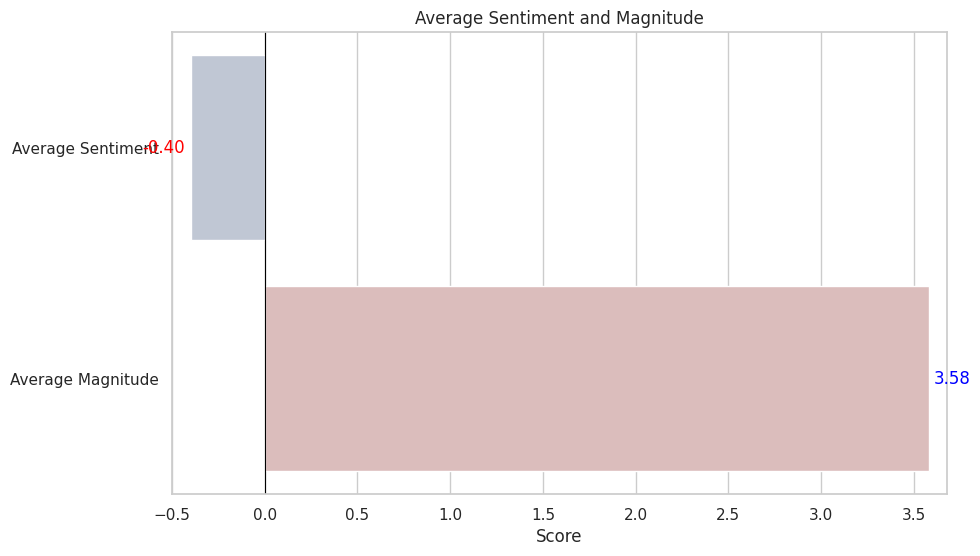

In [44]:
# Create horizontal bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=averages, y=names, palette="vlag")
plt.title('Average Sentiment and Magnitude')
plt.xlabel('Score')
plt.axvline(0, color='black', linewidth=0.8)  # adds a central axis

# Annotate bars with the actual values
for i, v in enumerate(averages):
    if v < 0:
        plt.text(v - 0.03, i, f"{v:.2f}", color='red', va='center', ha='right')
    else:
        plt.text(v + 0.03, i, f"{v:.2f}", color='blue', va='center', ha='left')

plt.xlim(min(averages) - 0.1, max(averages) + 0.1)  # to make space for text
plt.show()

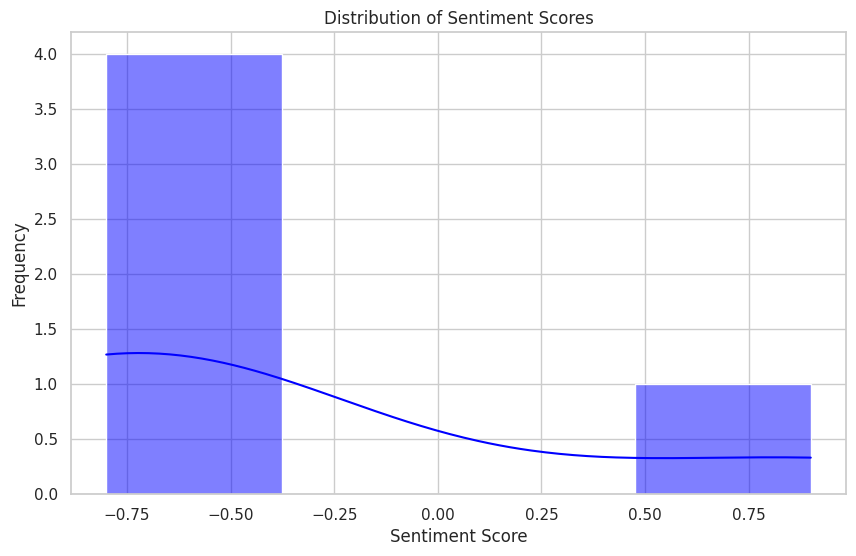

In [32]:
# Set visual style
sns.set(style="whitegrid")

# Visualization 1: Sentiment Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], kde=True, color='blue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

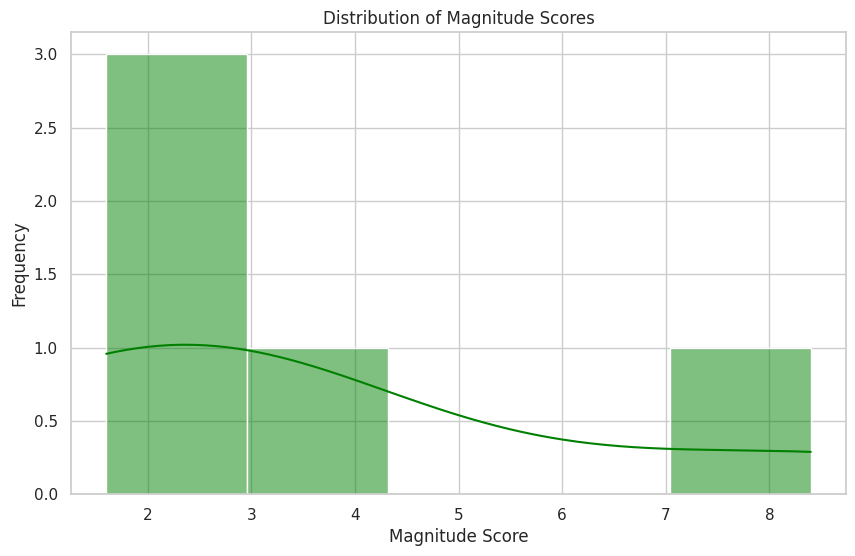

In [33]:
# Visualization 2: Magnitude Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['magnitude'], kde=True, color='green')
plt.title('Distribution of Magnitude Scores')
plt.xlabel('Magnitude Score')
plt.ylabel('Frequency')
plt.show()

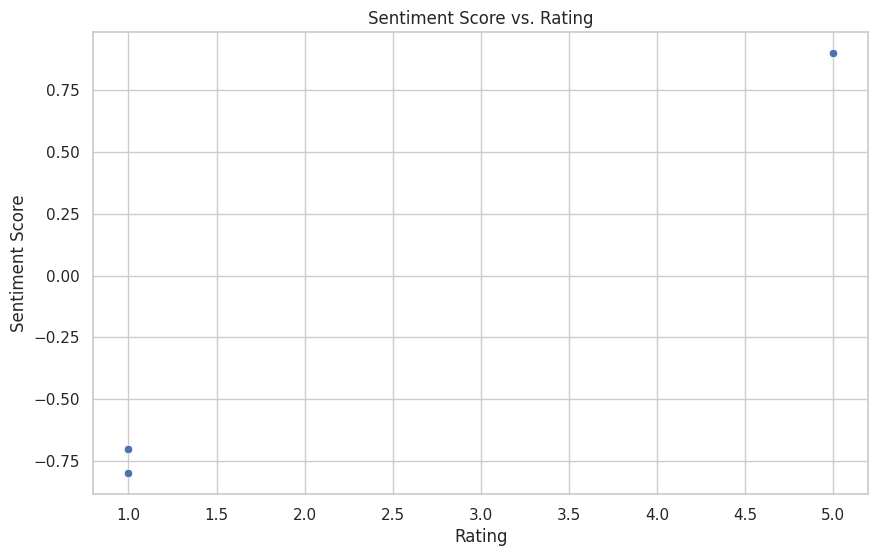

In [35]:
# Visualization 3: Sentiment Score vs. Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='sentiment', data=df)
plt.title('Sentiment Score vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Sentiment Score')
plt.show()

**Recommendations for the Marketing Manager:**


    
   **1. Improve Cleanliness and Maintenance:**
        The negative reviews frequently mention issues related to cleanliness and maintenance, especially in restrooms and the play area. Implement stricter cleaning schedules and routine checks to ensure cleanliness standards are consistently met.
        Consider a campaign to communicate these improvements to customers, reinforcing the commitment to providing a clean and safe environment.

   **2. Enhance Customer Service Training:**
        Multiple reviews point to staff behavior and service quality. Invest in customer service training programs to ensure staff are polite, helpful, and efficient.
        Create a feedback system where customers can directly communicate their service experience, ensuring continuous improvement and staff accountability.

   **3. Address Food Quality and Safety Concerns:**
        Reviews indicating food poisoning are alarming and need immediate attention. Conduct a thorough investigation into food handling processes and supply quality.
        Implement strict food safety protocols and regular staff training to prevent such incidents. Communicating these measures to the public can help in rebuilding trust.

   **4. Revitalize the Play Area:**
        The play area seems to be a significant factor for customer visits but is often found closed or unclean. Regular maintenance and ensuring the play area is open and clean can enhance customer satisfaction, particularly for families.

   **5. Optimize the Drive-Thru Experience:**
        Complaints about long waiting times in the drive-thru indicate a need for operational efficiency. Analyzing peak times and staffing accordingly, along with training staff for quick service, can improve customer experience.
        Implement a system to ensure that orders are accurate and customers receive all intended points or rewards, as these small factors significantly impact customer satisfaction.

   **6. Address Modernization Concerns:**
        While modernizing the restaurant is positive, it's crucial to balance it with the traditional values and expectations customers have from the brand. Ensure that modernization efforts do not alienate the core customer base.
        Feedback suggests that modernization efforts are sometimes seen as superficial. Focus on meaningful improvements that enhance customer experience, like digital ordering, loyalty programs, and menu innovation.

   **7. Feedback Loop and Customer Engagement:**
        Establish a more robust feedback loop where customers can voice their concerns and feel heard. Engaging with customers, especially those who leave negative reviews, can turn a negative experience into a positive one.
        Highlight positive changes made based on customer feedback in marketing campaigns, showcasing the brand's commitment to its customers.

   **8. Internal Culture and Training:**
        Reviews mention high staff turnover and a toxic work environment. Addressing these internal culture issues can improve employee satisfaction, which in turn will reflect in better customer service.
        Regular training and a supportive work environment can lead to better-prepared and more engaged employees.

Given that most of the reviews are concentrated in the evening and they are predominantly negative, this pattern suggests specific issues during the evening hours that require attention.

**Staff Performance Evaluation:**

  Conduct a detailed performance evaluation of the evening staff. This could involve monitoring, feedback sessions, and customer feedback specifically about staff interactions during the evening hours.


  Identify any gaps in training or areas where the evening staff might require additional support or guidance.



**Enhance Evening Operations:**

  Review the operational procedures during the evening shift. There might be operational challenges during these hours, such as understaffing, that contribute to negative customer experiences.


  Consider increasing staff during peak hours or rearranging staff schedules to ensure adequate coverage and prompt service.